In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving ionosphere.csv to ionosphere.csv


In [ ]:
data = pd.read_csv('ionosphere.csv')

In [ ]:
X, y = data.values[:, :-1], data.values[:, -1]

In [ ]:
X

array([[1, 0, 1.0, ..., -0.06288, -0.13738, -0.02447],
       [1, 0, 1.0, ..., -0.2418, 0.56045, -0.38238],
       [1, 0, 1.0, ..., 1.0, -0.32382, 1.0],
       ...,
       [1, 0, 0.94701, ..., 0.00442, 0.92697, -0.00577],
       [1, 0, 0.90608, ..., -0.03757, 0.87403, -0.16243],
       [1, 0, 0.8471, ..., -0.06678, 0.85764, -0.06151]], dtype=object)

In [ ]:
y[y == 'b'] = 0
y[y == 'g'] = 1
y

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.astype('float'), y.astype('int'), test_size=0.3, shuffle=True, stratify=y)

In [ ]:
!pip install optuna

     |████████████████████████████████| 308 kB 5.3 MB/s 
     |████████████████████████████████| 210 kB 44.6 MB/s 
     |████████████████████████████████| 81 kB 8.3 MB/s 
     |████████████████████████████████| 78 kB 6.2 MB/s 
     |████████████████████████████████| 49 kB 5.2 MB/s 
     |████████████████████████████████| 113 kB 55.0 MB/s 
     |████████████████████████████████| 146 kB 76.9 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=df039c230fb88ab14263663d5b3ed77267e680f8aac524393ae7a6d003444968
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import optuna
optuna.logging.set_verbosity(optuna.logging.ERROR)

In [ ]:
from sklearn.model_selection import cross_val_score

# Grid Search

In [ ]:
def objective_gs(trial):
    C_vals = trial.suggest_float("C", 1e-4, 1e4)
    l1_vals = trial.suggest_float("l1_ratio", 0, 1)
    clf_obj = LogisticRegression(solver='saga', penalty='elasticnet', C=C_vals, l1_ratio=l1_vals)
    score = cross_val_score(clf_obj, X_train, y_train, scoring='accuracy', n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy

In [ ]:
%%time
search_space = {'C': np.logspace(-4, 4, 20), 'l1_ratio': np.linspace(0, 1, 20)}
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.GridSampler(search_space))
study.optimize(objective_gs)

CPU times: user 7.18 s, sys: 281 ms, total: 7.47 s
Wall time: 19.7 s


In [ ]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [ ]:
print('LR, grid search, best trial:')
print(study.best_trial.params)
print('LR, grid search, best accuracy:')
print(study.best_value)
print('LR, grid search, best trial number:')
print(study.best_trial.number)

LR, grid search, best trial:
{'C': 0.23357214690901212, 'l1_ratio': 0.3684210526315789}
LR, grid search, best accuracy:
0.8572217203653518
LR, grid search, best trial number:
175


In [ ]:
fig = optuna.visualization.plot_contour(study, params=["C", "l1_ratio"])
fig.show()

In [ ]:
def evaluate_accuracy(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = (pred == y_test).mean()
    return accuracy

In [ ]:
model = LogisticRegression(solver='saga', penalty='elasticnet', C=study.best_trial.params['C'], l1_ratio=study.best_trial.params['l1_ratio'])
print('LR, grid search, accuracy on test:')
print(evaluate_accuracy(model, X_train, y_train, X_test, y_test))

LR, grid search, accuracy on test:
0.8571428571428571


# Random Search

In [ ]:
def objective(trial):
    C_vals = trial.suggest_float("C", 1e-4, 1e4, log=True)
    l1_vals = trial.suggest_float("l1_ratio", 0, 1)
    clf_obj = LogisticRegression(solver='saga', penalty='elasticnet', C=C_vals, l1_ratio=l1_vals)
    score = cross_val_score(clf_obj, X_train, y_train, scoring='accuracy', n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy

In [ ]:
%%time
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler())
study.optimize(objective, n_trials=400)

CPU times: user 4.54 s, sys: 239 ms, total: 4.78 s
Wall time: 15.8 s


In [ ]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [ ]:
print('LR, random search, best trial:')
print(study.best_trial.params)
print('LR, random search, best accuracy:')
print(study.best_value)
print('LR, random search, best trial number:')
print(study.best_trial.number)

LR, random search, best trial:
{'C': 0.2367437582703638, 'l1_ratio': 0.3740486000323081}
LR, random search, best accuracy:
0.8572217203653518
LR, random search, best trial number:
46


In [ ]:
fig = optuna.visualization.plot_contour(study, params=["C", "l1_ratio"])
fig.show()

In [ ]:
model = LogisticRegression(solver='saga', penalty='elasticnet', C=study.best_trial.params['C'], l1_ratio=study.best_trial.params['l1_ratio'])
print('LR, random search, accuracy on test:')
print(evaluate_accuracy(model, X_train, y_train, X_test, y_test))

LR, random search, accuracy on test:
0.8571428571428571


# TPE

In [ ]:
%%time
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=400)

CPU times: user 6.8 s, sys: 238 ms, total: 7.03 s
Wall time: 18.8 s


In [ ]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [ ]:
print('LR, TPE, best trial:')
print(study.best_trial.params)
print('LR, TPE, best accuracy:')
print(study.best_value)
print('LR, TPE, best trial number:')
print(study.best_trial.number)

LR, TPE, best trial:
{'C': 0.197943465699467, 'l1_ratio': 0.29575450220312494}
LR, TPE, best accuracy:
0.8612867610157583
LR, TPE, best trial number:
75


In [ ]:
fig = optuna.visualization.plot_contour(study, params=["C", "l1_ratio"])
fig.show()

In [ ]:
model = LogisticRegression(solver='saga', penalty='elasticnet', C=study.best_trial.params['C'], l1_ratio=study.best_trial.params['l1_ratio'])
print('LR, TPE, accuracy on test:')
print(evaluate_accuracy(model, X_train, y_train, X_test, y_test))

LR, TPE, accuracy on test:
0.8571428571428571


# CMA-ES

In [ ]:
%%time
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.CmaEsSampler())
study.optimize(objective, n_trials=400)

CPU times: user 5.38 s, sys: 272 ms, total: 5.66 s
Wall time: 19.9 s


In [ ]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [ ]:
print('LR, CMA-ES, best trial:')
print(study.best_trial.params)
print('LR, CMA-ES, best accuracy:')
print(study.best_value)
print('LR, CMA-ES, best trial number:')
print(study.best_trial.number)

LR, CMA-ES, best trial:
{'C': 0.1883520927692275, 'l1_ratio': 0.27560207922832886}
LR, CMA-ES, best accuracy:
0.8612867610157583
LR, CMA-ES, best trial number:
139


In [ ]:
fig = optuna.visualization.plot_contour(study, params=["C", "l1_ratio"])
fig.show()

In [ ]:
model = LogisticRegression(solver='saga', penalty='elasticnet', C=study.best_trial.params['C'], l1_ratio=study.best_trial.params['l1_ratio'])
print('LR, CMA-ES, accuracy on test:')
print(evaluate_accuracy(model, X_train, y_train, X_test, y_test))

LR, CMA-ES, accuracy on test:
0.8571428571428571


# Bayesian optimization

In [ ]:
! pip install scikit-optimize

     |████████████████████████████████| 100 kB 3.6 MB/s 


In [ ]:
from skopt import BayesSearchCV

In [ ]:
%%time 
opt = BayesSearchCV(
    LogisticRegression(solver='saga', penalty='elasticnet'), 
    {
        'C': (1e-4, 1e4, 'log-uniform'),
        'l1_ratio': (0, 1)
    },
    n_iter=400,
    cv=3,
    scoring='accuracy'
)
opt.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn

CPU times: user 2h 26min 45s, sys: 55min 48s, total: 3h 22min 34s
Wall time: 2h 25min 6s


In [ ]:
print('LR, BO, best trial:')
print(opt.best_params_)
print('LR, BO, best accuracy:')
print(opt.best_score_)
print('LR, BO, best trial number:')
print(opt.best_index_)

LR, BO, best trial:
OrderedDict([('C', 0.19079246136228992), ('l1_ratio', 0)])
LR, BO, best accuracy:
0.8571715346783098
LR, BO, best trial number:
21


In [ ]:
from skopt.plots import plot_objective, plot_convergence, plot_gaussian_process, plot_evaluations

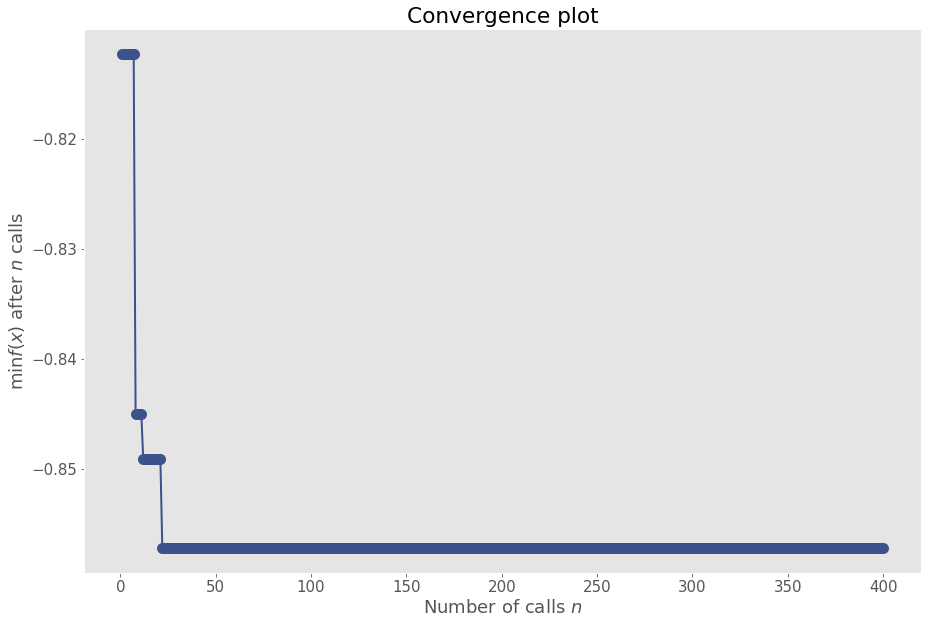

In [ ]:
plt.figure(figsize=(15, 10))
vis = plot_convergence(*opt.optimizer_results_)

<Figure size 1440x1080 with 0 Axes>

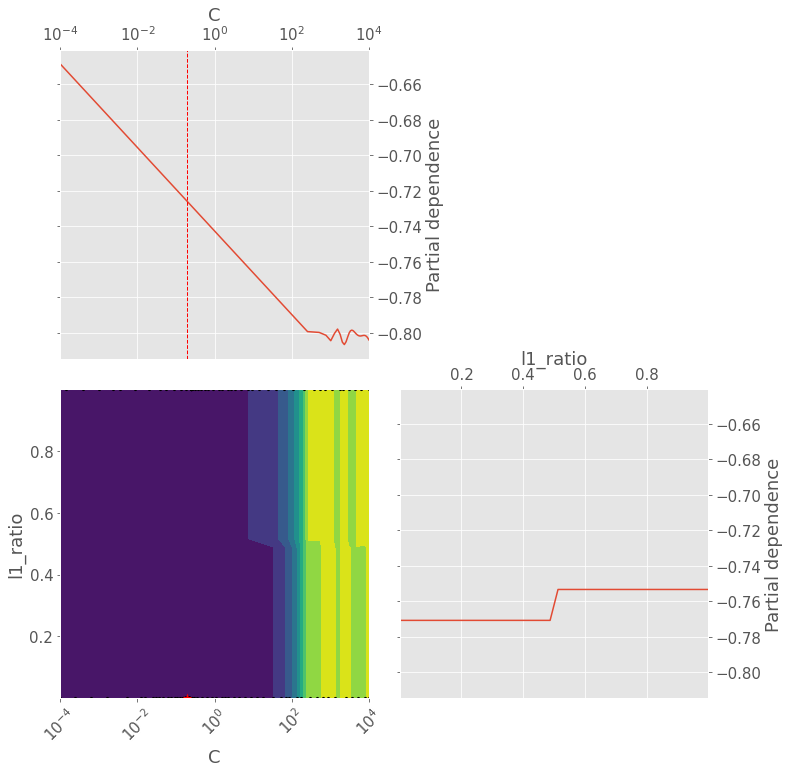

In [ ]:
plt.rc('font', size=15)
plt.rc('lines', mew=5)
plt.figure(figsize=(20, 15))
plot_objective(*opt.optimizer_results_, size=5)
plt.savefig(fname='LR_IO_BO.pdf')

In [ ]:
model = LogisticRegression(solver='saga', penalty='elasticnet', C=opt.best_params_['C'], l1_ratio=opt.best_params_['l1_ratio'])
print('LR, BO, accuracy on test:')
print(evaluate_accuracy(model, X_train, y_train, X_test, y_test))

LR, BO, accuracy on test:
0.8857142857142857
